<a id="top"></a>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel, Ph.D Astrophysics</a> .
</div>

<a id="data-desc"></a>

<h1> Data Description </h1>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

The data is taken from kaggle competition [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn). The main aim of the project is to predict whether a customer will leave (churn) the company or not based on given attributes. This is a binary classification problem and one of the most important usage of machine learning in business world.

**Content**  



Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


<a id="lib"></a>

<h1> Load the libraries </h1>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os,sys,time
import matplotlib.pyplot as plt
sns.set()

SEED = 100
pd.set_option('max_columns',100)
pd.set_option('max_colwidth',200)
pd.set_option('plotting.backend','matplotlib') # matplotlib, bokeh, altair, plotly
%load_ext watermark
%watermark -iv

seaborn  0.11.0
pandas   1.1.0
numpy    1.18.4
json     2.0.9
autopep8 1.5.2



In [2]:
# local imports
module_path = "/Users/poudel/Dropbox/a00_Bhishan_Modules/bhishan/"
sys.path.append(module_path)

from pandas_api import BPAccessor
from plot_utils import add_text_barplot

<a id="useful" ></a>

<h1> Useful Scripts </h1> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [3]:
def show_methods(obj, ncols=4,contains=None):
    lst = [i for i in dir(obj) if i[0]!='_' ]
    if contains is not None:
        lst = [i for i in lst if contains in i]
    df = pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')
    return df

<a id="load-data" ></a>

<h1> Load the Data </h1> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [4]:
path_raw = '../data/raw/telco_customer_churn.csv'
df = pd.read_csv(path_raw)

print(df.shape)
df.head(2).append(df.tail(2))

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
target_name = 'Churn'

<a id="eda" ></a>

<h1> Exploratory Data Analysis (EDA)  </h1> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.bp.describe()

,Feature,Type,N,Count,Unique,Missing,MissingPct,Zeros,ZerosPct,mean,std,min,max,25%,50%,75%
2,SeniorCitizen,int64,7043,7043,2,0,0.00,5901,83.79,0.16,0.37,0.00,1.00,0.00,0.00,0.00
5,tenure,int64,7043,7043,73,0,0.00,11,0.16,32.37,24.56,0.00,72.00,9.00,29.00,55.00
0,customerID,object,7043,7043,7043,0,0.00,0,0.00,,,,,,,
1,gender,object,7043,7043,2,0,0.00,0,0.00,,,,,,,
3,Partner,object,7043,7043,2,0,0.00,0,0.00,,,,,,,
4,Dependents,object,7043,7043,2,0,0.00,0,0.00,,,,,,,
6,PhoneService,object,7043,7043,2,0,0.00,0,0.00,,,,,,,
7,MultipleLines,object,7043,7043,3,0,0.00,0,0.00,,,,,,,
8,InternetService,object,7043,7043,3,0,0.00,0,0.00,,,,,,,
9,OnlineSecurity,object,7043,7043,3,0,0.00,0,0.00,,,,,,,


In [8]:
"""
Look at the feature with datatype object,
the feature TotalCharges should be float but it is object.

""";

<a id="" ></a>

<h2>  Delete Unwanted Features </h2> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [9]:
cols_drop = ['customerID']
df = df.drop(cols_drop,axis=1)

<a id="col-names" ></a>

<h2> Change Column names </h2> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

We have all the column names as CamelCase except `gender and tenure`, change them to CamelCase.

In [10]:
df = df.rename(columns=lambda x: x[0].capitalize()+x[1:].strip())
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id="" ></a>

<h2>  Unique Value Counts</h2> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [11]:
cols_obj = df.select_dtypes('object').columns.tolist()
print(cols_obj)

['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [12]:
# exclude total charges
cols_obj2 = [i for i in cols_obj if i not in ['TotalCharges']]

df[cols_obj2].apply(pd.Series.nunique).sort_values()

Gender              2
Partner             2
Dependents          2
PhoneService        2
PaperlessBilling    2
Churn               2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaymentMethod       4
dtype: int64

In [13]:
df[cols_obj2].apply(lambda x: list(pd.Series.unique(x)))

Gender                                                                                    [Female, Male]
Partner                                                                                        [Yes, No]
Dependents                                                                                     [No, Yes]
PhoneService                                                                                   [No, Yes]
MultipleLines                                                                [No phone service, No, Yes]
InternetService                                                                   [DSL, Fiber optic, No]
OnlineSecurity                                                            [No, Yes, No internet service]
OnlineBackup                                                              [Yes, No, No internet service]
DeviceProtection                                                          [No, Yes, No internet service]
TechSupport                                            

<a id="" ></a>

<h2>  Data Types </h2> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],
                                   errors='coerce')

df[df.TotalCharges.isna()].shape # bad rows

(11, 20)

In [15]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

<a id="" ></a>

<h1>  Target Distribution </h1> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [16]:
target_name = 'Churn'

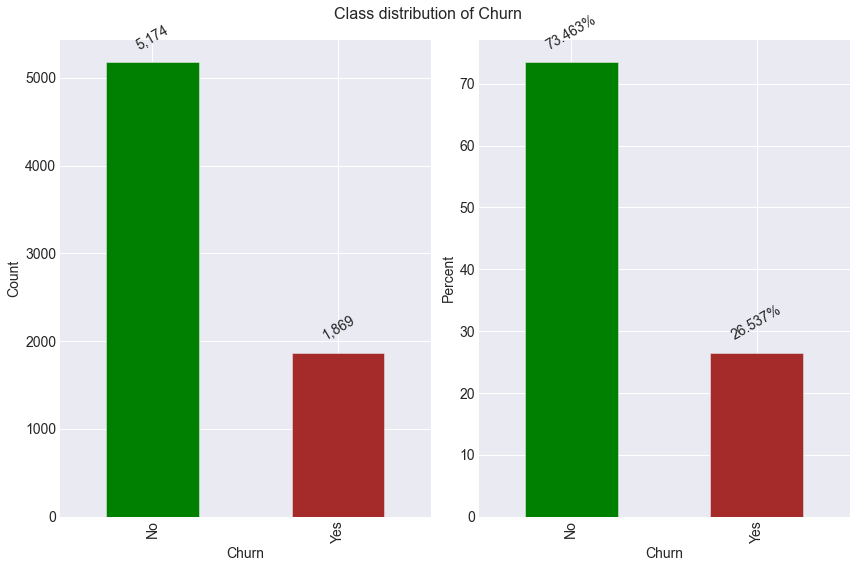

In [17]:
df.bp.plot_cat(target_name,colors=['green','brown'])

<a id="" ></a>

<h1>  Numerical Features </h1> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

<a id="" ></a>

<h1>  Categorical Features </h1> 

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to TOC">Go to Top</a>

In [18]:
cols_cat = [i for i in cols_obj if i not in [target_name,'TotalCharges']]
print(len(cols_cat), cols_cat)

df[cols_cat].apply(pd.Series.nunique) # Make sure you dont have too large numbers

15 ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

Feature: **Gender**
Overall Count: 
    Male: 50.48%
    Female: 49.52%

Total  **Churn_Yes** distribution:
    Female: 50.24%
    Male: 49.76%

Per Gender  **Churn_Yes** distribution:
    Female: 26.92%
    Male: 26.16%


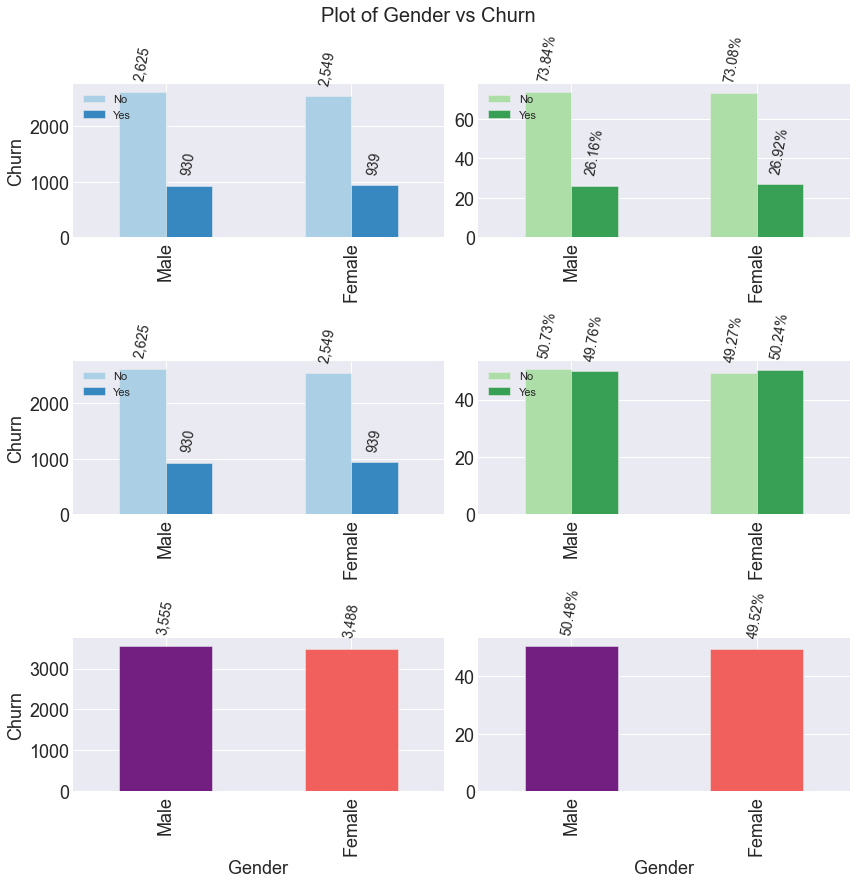

In [19]:
col = 'Gender'
df.bp.plot_cat_cat(col,target_name)

In [20]:
"""
Let's understand the chart.

Look at bottom chart:
  Out of 100% customers, 50.48% are male.
  Out of 100% customers, 49.52% are female.
  The company is pretty inclusive.

Look at middle right plot:
  Out of 100% people who churned, 49.76% are male.
  Out of 100% people who churned, 50.24% are female.
  The difference is not significant.

Look at top right plot:
  Out of 100% Males,   26.16% churned.
  Out of 100% Females, 26.92% churned.
  The difference is not significant.

""";

In [21]:
from plot_ds import plot_cat_yes_no

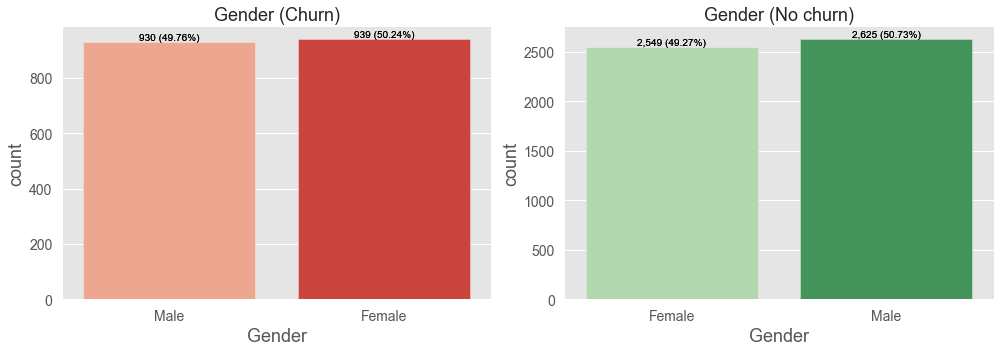

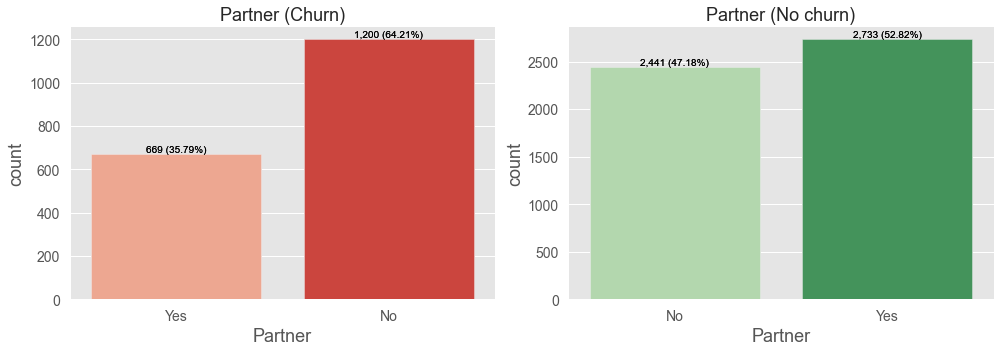

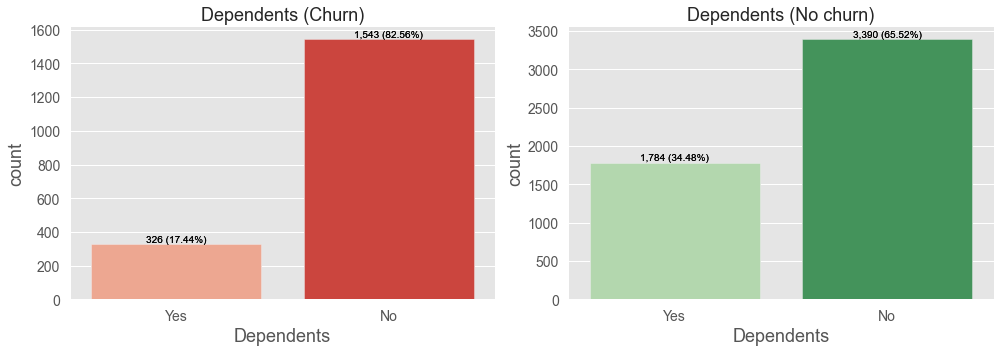

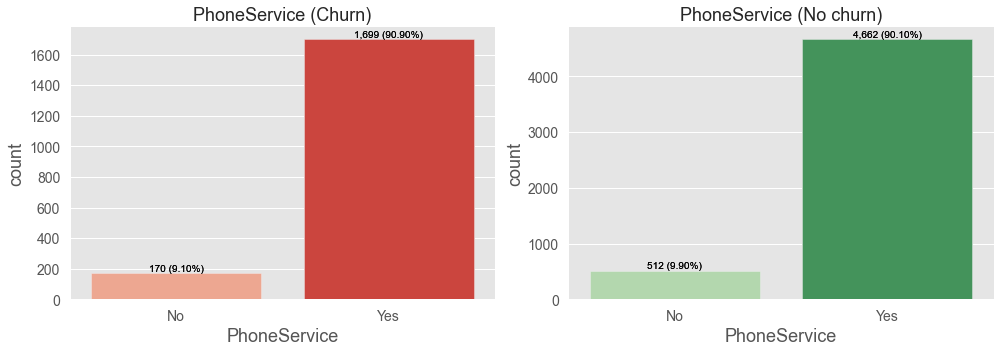

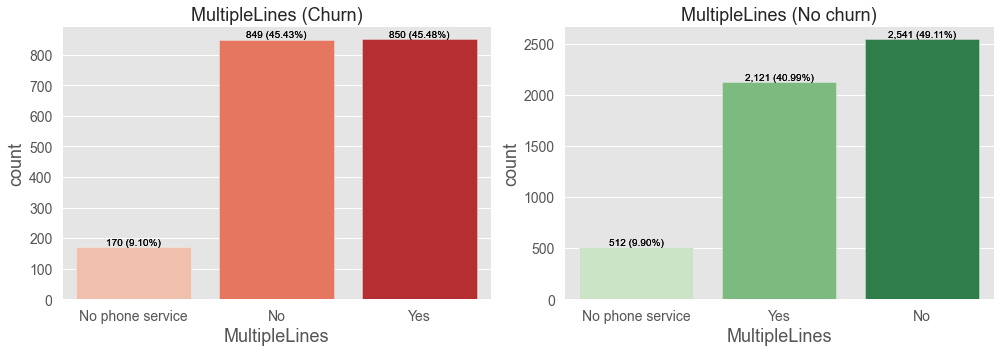

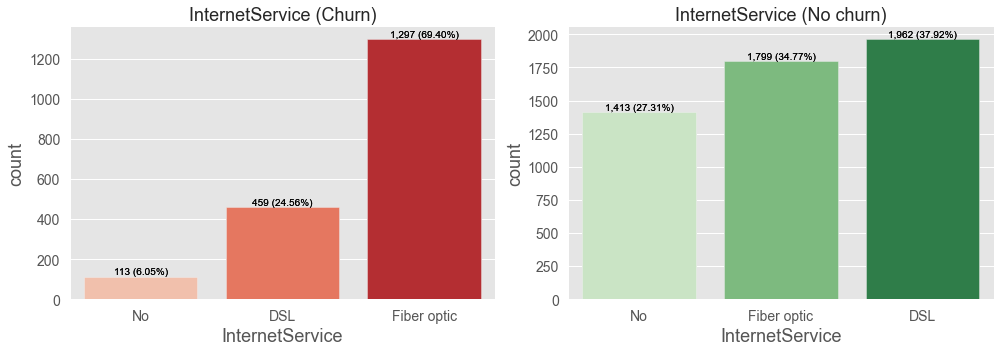

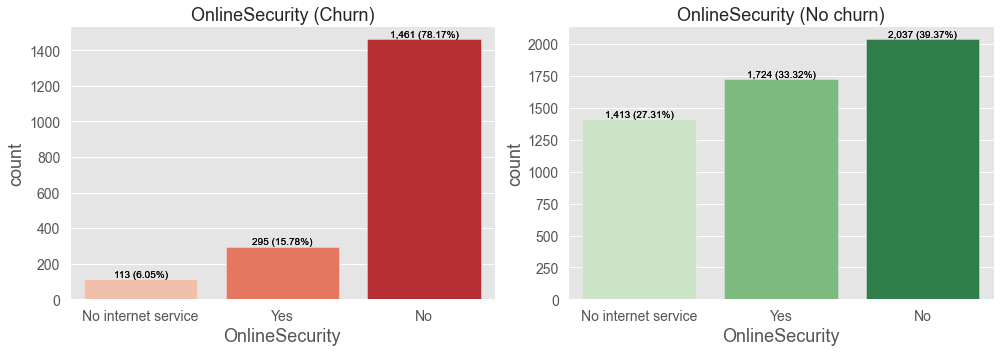

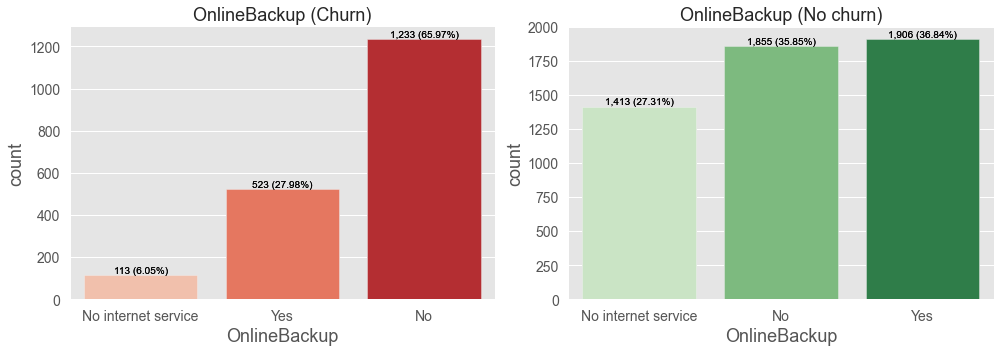

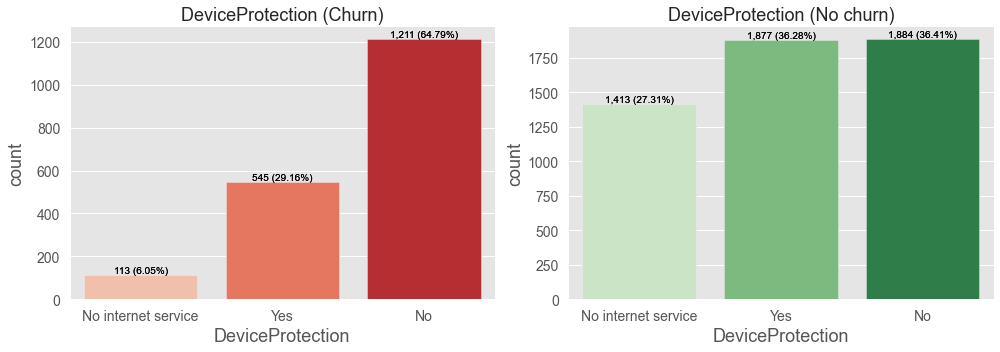

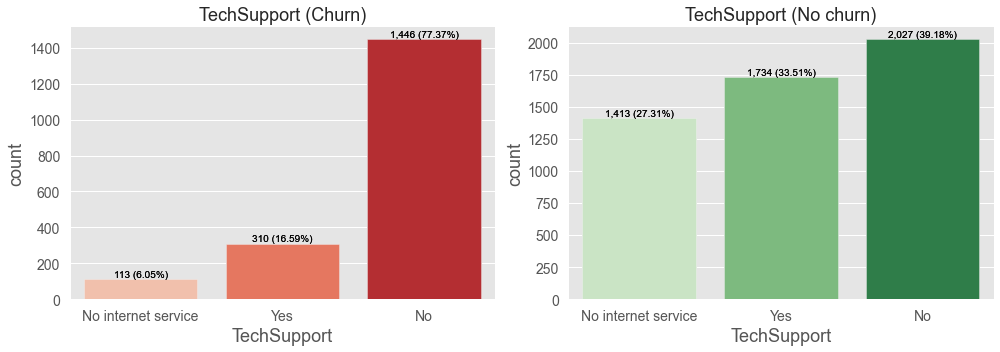

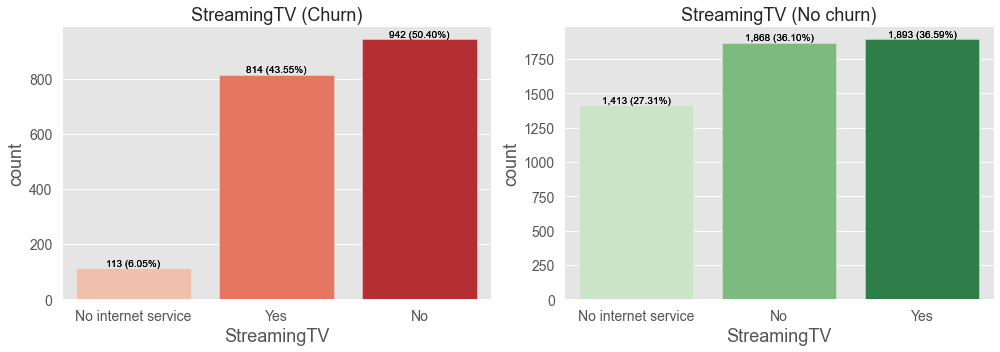

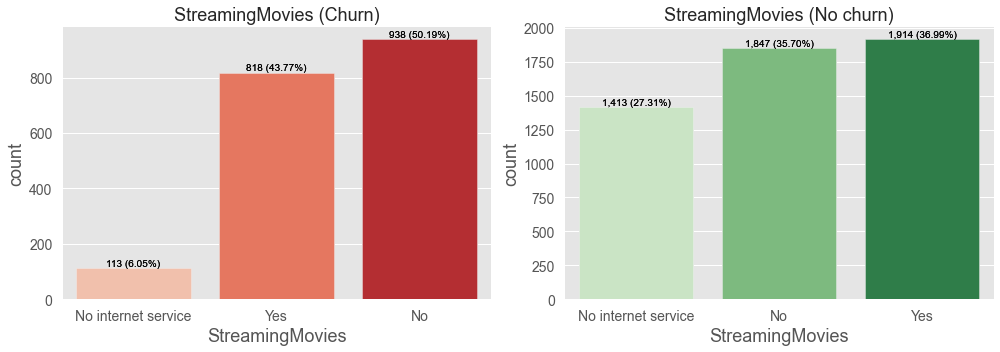

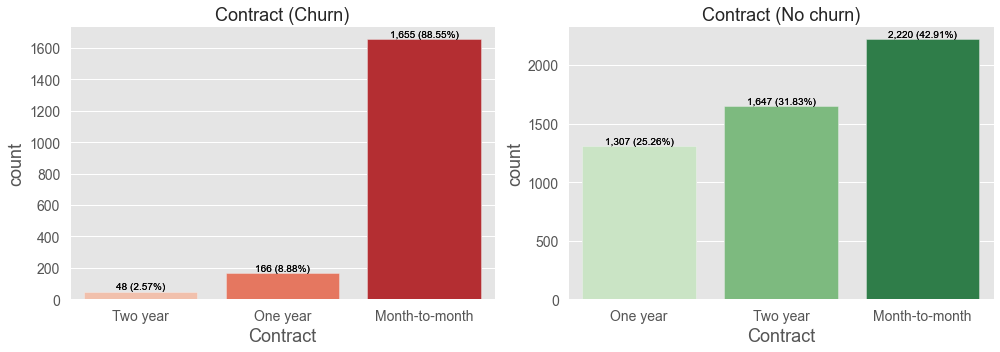

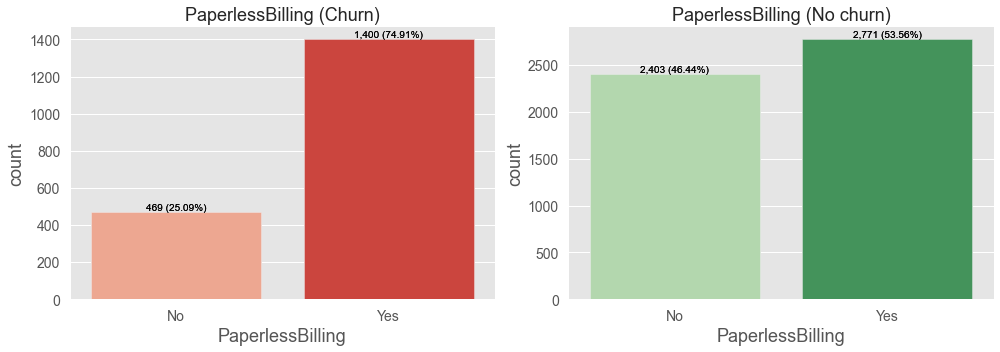

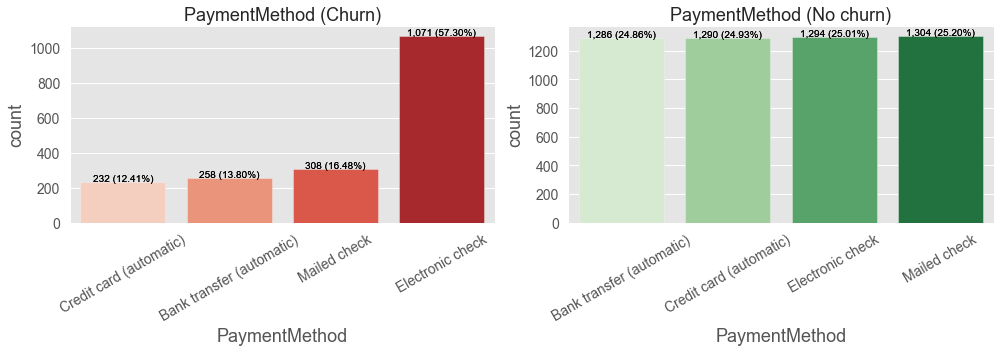

In [22]:
for col in cols_cat:
    rot = 30 if col in ['PaymentMethod'] else 0
    plot_cat_yes_no(df, col,target_name,rot=rot,save=True)